In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

** Reading dataset and storing it in a df **

In [2]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Understanding the provided data

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
#display the category values in a column and count per category
cars['fueltype'].astype('category').value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

** Inference ** : majority of vehicles is of Gas type

In [5]:
cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

** Inference ** : records with symboling values as -1 and -2 is less

In [6]:
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

** Inference ** : most of the cars in data are of standard aspiration type

In [7]:
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

** Inference **: Most of the cars is of forward wheel drive

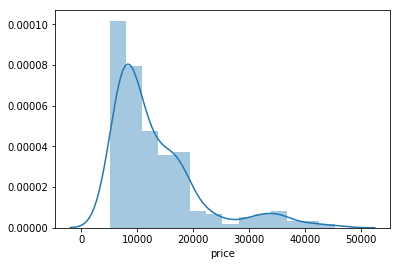

In [8]:
sns.distplot(cars['price'])
plt.show()

** Bivariate Analysis **

In [9]:
cars['fuelsystem'].astype('category').value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [10]:
#taking all categorical values from the dataset
cars_categorical = cars.select_dtypes(include = ['object'])
cars_categorical.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [11]:
car_price = pd.DataFrame(cars['price'])

In [12]:
car_price.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [13]:
cars_cat = pd.concat([cars_categorical,car_price],axis=1)
cars_cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


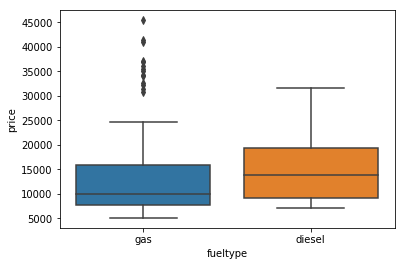

In [14]:
sns.boxplot(x='fueltype', y ='price', data = cars_cat)
plt.show()

** Inference **: Gas vehicles are priced less compared to diesel vehicles

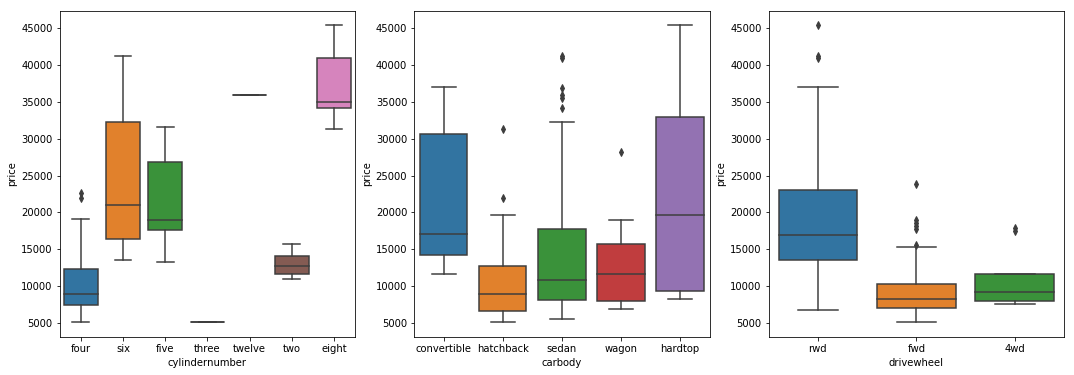

In [15]:
plt.figure(1)
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(x='cylindernumber', y = 'price', data= cars_cat)
plt.subplot(1,3,2)
sns.boxplot(x='carbody', y = 'price', data= cars_cat)
plt.subplot(1,3,3)
sns.boxplot(x='drivewheel', y = 'price', data=cars_cat)
plt.show()

** Inferences: **
1. More the cylinders more the cost, two cylinder and three cylinder cars are a less in numbers
2. convertibles are costly
3. Hardtop is available in the entire price range
4. some sedans are very costly -- outliers
4. rear wheel drive cars are costly

In [16]:
#selecting numerical columns from the dataset
cars_numerical = cars.select_dtypes(include=['int64', 'float64'])
cars_numerical.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
#dropping car_id and symboling
cars_numerical.drop('car_ID',axis=1, inplace = True)
cars_numerical.drop('symboling',axis=1, inplace = True)

F:\Anaconda_3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\Anaconda_3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
cars_numerical.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


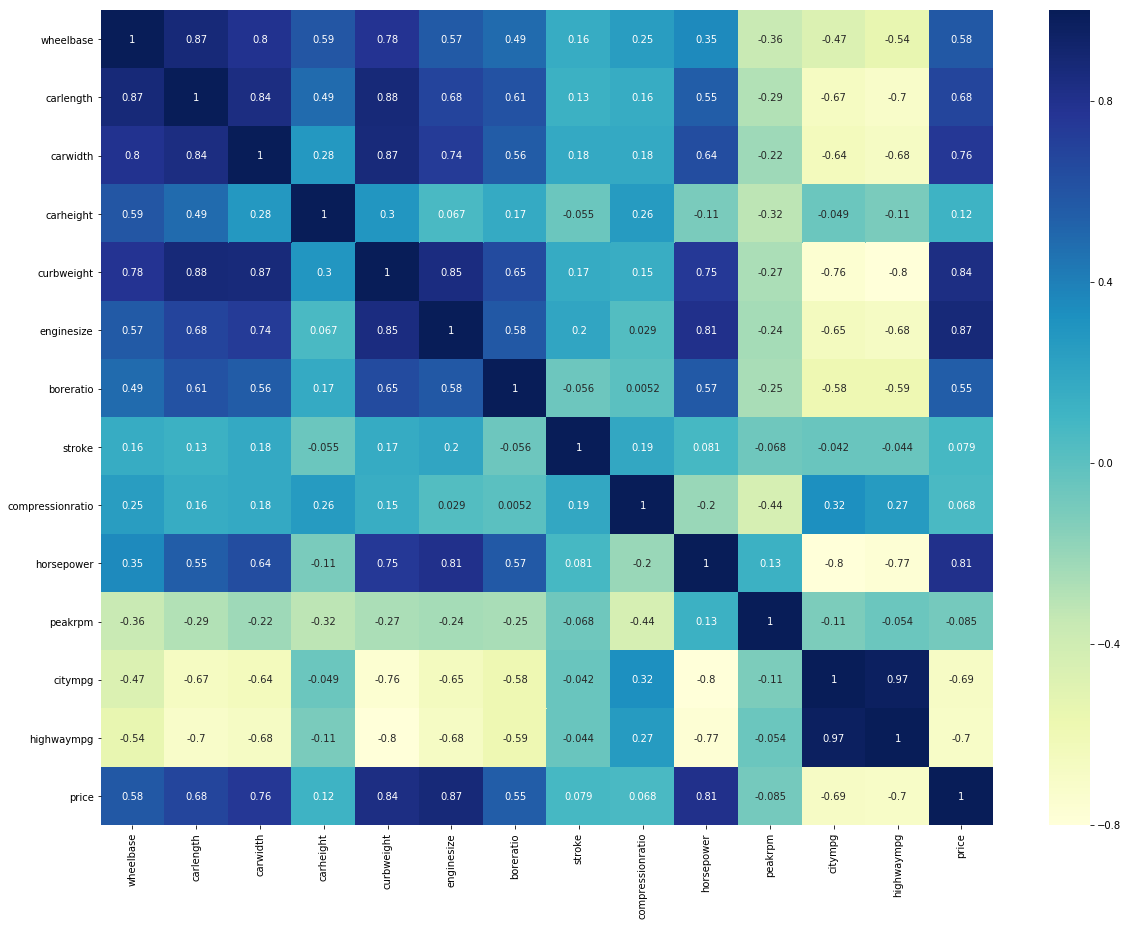

In [19]:
cor = cars_numerical.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap="YlGnBu", annot= True)
plt.show()

** Inferences ** 
1. Car price is positively and highly correlated to Wheelbase, carlength, carwidth, curbweight, enginesize, boreratio and HP,
meaning more the material used, more the cost
2. Milegage is negatively correlated. Economical segment category cars where mileage is a selling point

In [20]:
cars['symboling'].describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

In [21]:
#changing the float64 dtype to object
cars['symboling'] = cars['symboling'].astype('object')
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [22]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

In [23]:
#Split CarName to get the company name
import re
def split_car_name(CarName):
    return (re.split(r'(\W+|\-)',CarName))[0]

cars['company']=cars['CarName'].apply(split_car_name)

In [24]:
cars['company'].astype('category').value_counts()

toyota        31
nissan        17
mazda         15
mitsubishi    13
honda         13
subaru        12
volvo         11
peugeot       11
volkswagen     9
dodge          9
buick          8
bmw            8
plymouth       7
audi           7
saab           6
porsche        4
isuzu          4
chevrolet      3
alfa           3
jaguar         3
vw             2
maxda          2
renault        2
mercury        1
porcshce       1
toyouta        1
vokswagen      1
Nissan         1
Name: company, dtype: int64

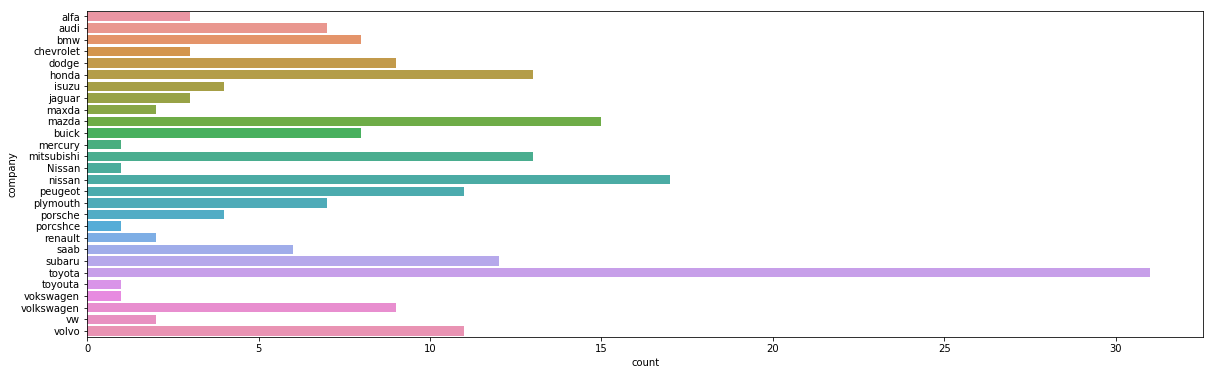

In [25]:
plt.figure(figsize = (20,6))
sns.countplot(y = cars['company'])
plt.show()

In [26]:
#replacing misspelled company names
#volkswagon
cars.loc[(cars['company'] == 'vw')|(cars['company'] == 'vokswagen'), 'company'] = 'volkswagen'

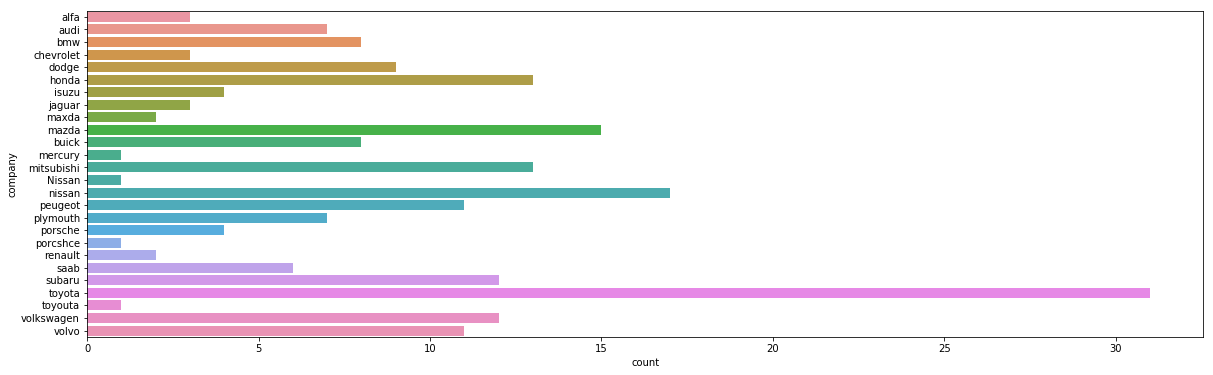

In [27]:
plt.figure(figsize = (20,6))
sns.countplot(y = cars['company'])
plt.show()

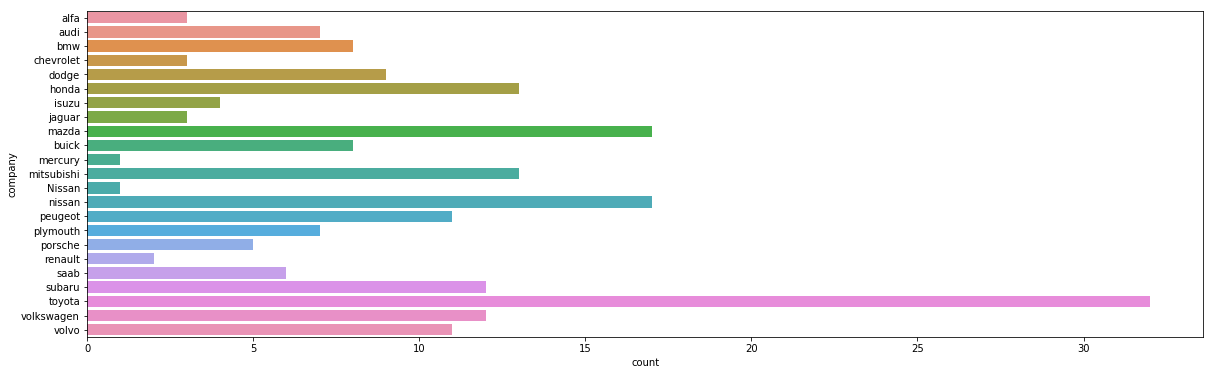

In [28]:
#mazda
cars.loc[(cars['company'] == 'maxda'),'company'] = 'mazda'
#toyota
cars.loc[(cars['company'] == 'toyouta'),'company'] = 'toyota'
#porcshe
cars.loc[(cars['company'] == 'porcshce'),'company'] = 'porsche'

plt.figure(figsize = (20,6))
sns.countplot(y=cars['company'])
plt.show()

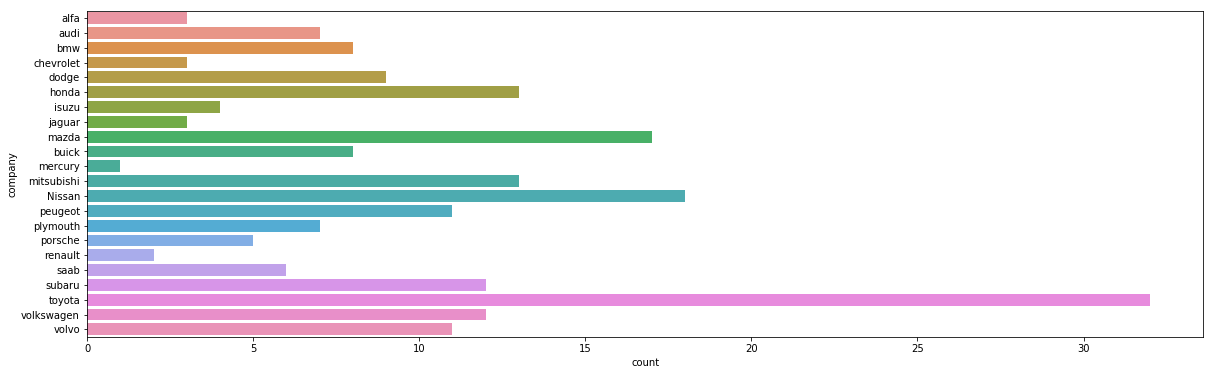

In [29]:
#Nissan
cars.loc[(cars['company'] == 'nissan'),'company'] = 'Nissan'
plt.figure(figsize = (20,6))
sns.countplot(y=cars['company'])
plt.show()

In [30]:
print(cars.columns)

Index([u'car_ID', u'symboling', u'CarName', u'fueltype', u'aspiration',
       u'doornumber', u'carbody', u'drivewheel', u'enginelocation',
       u'wheelbase', u'carlength', u'carwidth', u'carheight', u'curbweight',
       u'enginetype', u'cylindernumber', u'enginesize', u'fuelsystem',
       u'boreratio', u'stroke', u'compressionratio', u'horsepower', u'peakrpm',
       u'citympg', u'highwaympg', u'price', u'company'],
      dtype='object')


In [31]:
#dropping carName columns
cars.drop('CarName', axis=1, inplace = True)

In [32]:
print(cars.columns)

Index([u'car_ID', u'symboling', u'fueltype', u'aspiration', u'doornumber',
       u'carbody', u'drivewheel', u'enginelocation', u'wheelbase',
       u'carlength', u'carwidth', u'carheight', u'curbweight', u'enginetype',
       u'cylindernumber', u'enginesize', u'fuelsystem', u'boreratio',
       u'stroke', u'compressionratio', u'horsepower', u'peakrpm', u'citympg',
       u'highwaympg', u'price', u'company'],
      dtype='object')


In [33]:
#dropping car_ID
cars.drop('car_ID', axis =1, inplace = True)

** Data Preparation **

In [34]:
cols = list(cars.columns)
cols.remove('price')
print(cols)

['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'company']


In [35]:
X=cars.loc[:,cols]
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [36]:
y= cars.price

In [37]:
#creation of dummy variables
#selecting all categorical values from X table
X_category = X.select_dtypes(include = ['object'])
X_category.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [38]:
X_dummies = pd.get_dummies(X_category, drop_first=True)
X_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,company_mitsubishi,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X = X.drop(list(X_category.columns),axis =1)

In [40]:
X = pd.concat([X,X_dummies],axis =1)
print(len(X.columns))
print(X.columns)

68
Index([u'wheelbase', u'carlength', u'carwidth', u'carheight', u'curbweight',
       u'enginesize', u'boreratio', u'stroke', u'compressionratio',
       u'horsepower', u'peakrpm', u'citympg', u'highwaympg', u'symboling_-1',
       u'symboling_0', u'symboling_1', u'symboling_2', u'symboling_3',
       u'fueltype_gas', u'aspiration_turbo', u'doornumber_two',
       u'carbody_hardtop', u'carbody_hatchback', u'carbody_sedan',
       u'carbody_wagon', u'drivewheel_fwd', u'drivewheel_rwd',
       u'enginelocation_rear', u'enginetype_dohcv', u'enginetype_l',
       u'enginetype_ohc', u'enginetype_ohcf', u'enginetype_ohcv',
       u'enginetype_rotor', u'cylindernumber_five', u'cylindernumber_four',
       u'cylindernumber_six', u'cylindernumber_three',
       u'cylindernumber_twelve', u'cylindernumber_two', u'fuelsystem_2bbl',
       u'fuelsystem_4bbl', u'fuelsystem_idi', u'fuelsystem_mfi',
       u'fuelsystem_mpfi', u'fuelsystem_spdi', u'fuelsystem_spfi',
       u'company_alfa', u'company_a

In [41]:
from sklearn.preprocessing import scale
xcols = X.columns
X = pd.DataFrame(scale(X))
X.columns = xcols
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,company_mitsubishi,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.260208,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.260208,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.260208,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.260208,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.260208,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


In [42]:
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state=100)

F:\Anaconda_3.6\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
#first model with all columns
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
print(lm.coef_)
print(lm.intercept_)

[ 1.28804792e+03 -1.04955210e+03  1.68834559e+03 -1.25904071e+03
  2.42027090e+03  1.16263350e+04 -4.85038954e+03 -1.13424087e+03
 -2.56951960e+03 -9.73644812e+02  1.35681433e+03 -2.61818510e+02
  7.44239551e+02  7.36334360e+02  8.01800617e+02  7.02360200e+02
  6.47750839e+02  3.50558608e+02 -1.20683560e+03  1.01248452e+03
 -2.33385958e+02 -7.69280387e+02 -1.83640992e+03 -1.66162816e+03
 -9.12566337e+02 -9.28943930e+01  4.42816604e+02  1.21814422e+03
  5.50557360e+02 -7.27633535e+01  1.55937229e+02  7.68350388e+02
 -2.89587453e+02  2.03544173e+03  2.20137145e+03  6.79103088e+03
  1.39274072e+03  1.82885132e+03 -1.04955642e+03  2.03544173e+03
  4.50875447e+02 -1.64299332e+02  1.20683560e+03 -4.09272616e-12
 -2.08926886e+02 -5.83874480e+01  2.50111043e-12 -1.53236091e+02
  2.89831065e+02  2.14792377e+03  1.29676391e+02 -3.36562455e+02
 -9.59847437e+02 -8.30739957e+02 -1.16171269e+02 -6.45447941e+02
 -4.10936364e+01 -2.84217094e-14 -1.37063745e+03 -6.41255410e+02
 -9.15945492e+02  1.24708

In [52]:
y_test.head()

160    7738.0
186    8495.0
59     8845.0
165    9298.0
140    7603.0
Name: price, dtype: float64

In [44]:
#first model prediction
y_pred = lm.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8399531986132464


In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

8547759.494120592


In [53]:
y_pred.head()

160     7859.873910
186     9783.320906
59     11558.494620
165     7097.259294
140     7102.219508
dtype: float64

In [45]:
#reducing the number of variable using RFE
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe_15 = RFE(lm,15)
rfe_15.fit(X_train,y_train)
y_pred = rfe_15.predict(X_test)
print(r2_score(y_test,y_pred))


0.8941491916479422


In [46]:
#further reducing the number of variabeles to 6
lm = LinearRegression()
rfe_6 = RFE(lm,6)
rfe_6.fit(X_train,y_train)
y_pred = rfe_6.predict(X_test)
print(r2_score(y_test,y_pred))

0.8851422877312572


In [47]:
import statsmodels.api as sm
col6 = X_train.columns[rfe_6.support_]
X_train_6 = X_train[col6]
X_train_6 = sm.add_constant(X_train_6)
X_train_6.head()

F:\Anaconda_3.6\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,const,carwidth,curbweight,enginesize,enginelocation_rear,company_bmw,company_porsche
122,1.0,-0.984972,-0.701886,-0.695874,-0.121867,-0.201517,-0.158114
125,1.0,1.117866,0.428245,0.579974,-0.121867,-0.201517,6.324555
166,1.0,-0.891512,-0.492032,-0.695874,-0.121867,-0.201517,-0.158114
1,1.0,-0.844782,-0.014566,0.074449,-0.121867,-0.201517,-0.158114
199,1.0,0.603839,1.157921,0.074449,-0.121867,-0.201517,-0.158114


In [48]:
lm_6 = sm.OLS(y_train,X_train_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     184.8
Date:                Sat, 19 May 2018   Prob (F-statistic):           7.79e-63
Time:                        00:54:53   Log-Likelihood:                -1325.8
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     136   BIC:                             2686.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.339e+04    

In [49]:
X_test_6 = X_test[col6]
X_test_6 = sm.add_constant(X_test_6)
y_pred = lm_6.predict(X_test_6)
print(r2_score(y_test,y_pred))

0.8851422877312571


In [50]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []
for n_features in range(4,20):
    lm = LinearRegression()
    rfe_n = RFE(lm,n_features)
    rfe_n.fit(X_train,y_train)
    
    col_n = X_train.columns[rfe_n.support_]
    X_train_n = X_train[col_n]
    
    X_train_n = sm.add_constant(X_train_n)
    
    lm_n = sm.OLS(y_train,X_train_n).fit()
    
    X_test_n = X_test[col_n]
    X_test_n = sm.add_constant(X_test_n, has_constant = 'add')
    y_pred = lm_n.predict(X_test_n)
    
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test,y_pred))

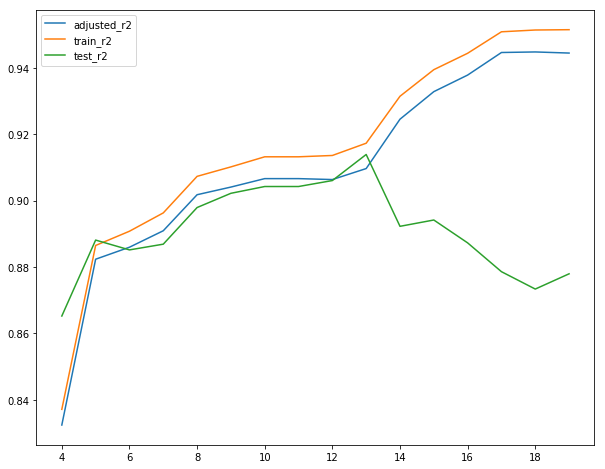

In [51]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()